In [ ]:
!pip install PyPortfolioOpt

In [ ]:
!pip install yfinance

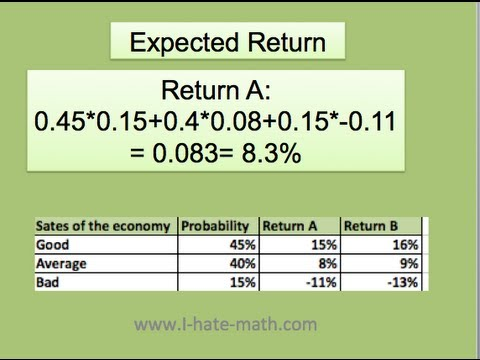

Portfolio Variance

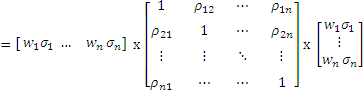

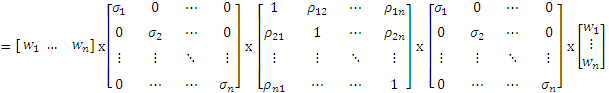

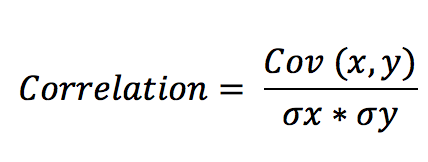

Portfolio Variance = Weight transpose * Covariance Matrix * Weight

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import CLA, plotting


In [2]:
'''
let's get ETF data
SPY = S&P 500 ETF
QQQ = Nasdaq ETF
GLD = SPDR Gold ETF
IEF = 7-10y bond ETF 
TMF = 20+ y bond 3x ETF
''' 
data = yf.download(tickers = "SPY QQQ GLD IEF TMF",period ='10y' )

[*********************100%***********************]  5 of 5 completed


In [3]:
df = data.Close.fillna(method='ffill') # ใส่ข้อมูลวันก่อนแทนการ drop na

In [4]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [5]:
mu

GLD    0.003267
IEF    0.011195
QQQ    0.204433
SPY    0.139469
TMF    0.055186
dtype: float64

In [6]:
n = len(df)/252 # วิธีคำนวณของฟังก์ชัน mean_historical_return เริ่มต้นหารายไปใช้ 252

In [7]:
(df.iloc[-1]/df.iloc[0])**(1/n)-1 # เข้าสูตร ( ราคาเริ่ม / ราคาสุดท้าย ) ** (1/จำนวนปี)-1 ซึ่งเป็นสูตร Grometric mean

GLD    0.003265
IEF    0.011191
QQQ    0.204344
SPY    0.139410
TMF    0.055164
dtype: float64

In [8]:
S

,GLD,IEF,QQQ,SPY,TMF
GLD,0.023514,0.002471,0.001545,0.001088,0.013983
IEF,0.002471,0.003178,-0.003488,-0.003641,0.021270
QQQ,0.001545,-0.003488,0.037186,0.029226,-0.025424
SPY,0.001088,-0.003641,0.029226,0.027188,-0.027437
TMF,0.013983,0.021270,-0.025424,-0.027437,0.168046


In [9]:
df.pct_change().cov()*252

,GLD,IEF,QQQ,SPY,TMF
GLD,0.023514,0.002471,0.001545,0.001088,0.013983
IEF,0.002471,0.003178,-0.003488,-0.003641,0.021270
QQQ,0.001545,-0.003488,0.037186,0.029226,-0.025424
SPY,0.001088,-0.003641,0.029226,0.027188,-0.027437
TMF,0.013983,0.021270,-0.025424,-0.027437,0.168046


In [10]:
ef = EfficientFrontier(mu, S)

In [11]:
ef

In [12]:
raw_weights = ef.max_sharpe()

In [13]:
raw_weights # output คือถือหุ้นแต่ละตัวใน port เป็น %

OrderedDict([('GLD', 0.0),
             ('IEF', 0.0),
             ('QQQ', 0.8416955366529293),
             ('SPY', 0.0),
             ('TMF', 0.1583044633470708)])

In [14]:
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('GLD', 0.0),
             ('IEF', 0.0),
             ('QQQ', 0.8417),
             ('SPY', 0.0),
             ('TMF', 0.1583)])

In [15]:
ef.portfolio_performance(verbose=True)

Expected annual return: 18.1%
Annual volatility: 15.4%
Sharpe Ratio: 1.04


(0.1808069231157521, 0.15420880726289904, 1.0427868937576596)

Expected annual return: 9.7%
Annual volatility: 8.1%
Sharpe Ratio: 0.95


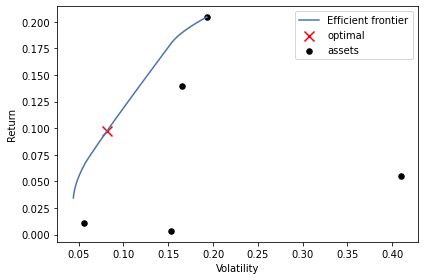

In [16]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);
ax = plotting.plot_efficient_frontier(cla, showfig=False)


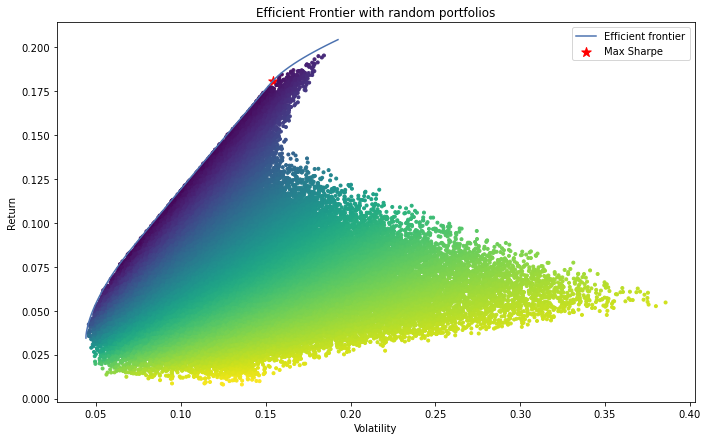

In [17]:
n_samples = 100000
w = np.random.dirichlet(np.ones(len(mu)), n_samples) # dirichlet ทำให้ random ค่าไม่เกิน 1
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize=(10,6))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.show()

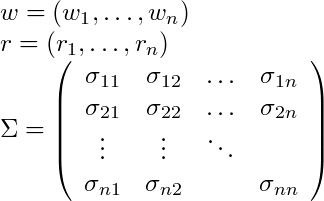

In [18]:
np.random.dirichlet(np.ones(len(mu)), n_samples)

array([[0.18912091, 0.17195518, 0.16379747, 0.19177958, 0.28334687],
       [0.35276595, 0.16824948, 0.08499087, 0.19050913, 0.20348456],
       [0.25058621, 0.29663477, 0.14899324, 0.29791884, 0.00586694],
       ...,
       [0.15633441, 0.69031027, 0.01375194, 0.08794587, 0.05165751],
       [0.75522572, 0.08214193, 0.08238525, 0.0310346 , 0.0492125 ],
       [0.00224867, 0.14045838, 0.05004358, 0.16998279, 0.63726658]])

In [19]:
rets = w.dot(mu)
len(rets)

100000

In [20]:
test2 = np.random.random(5) # distribution random
test2

array([0.53649469, 0.85161355, 0.41610828, 0.34027578, 0.15353581])

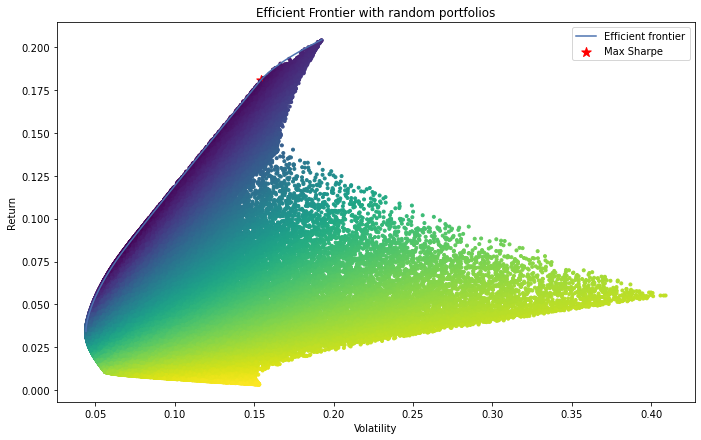

In [21]:
n_samples = 200000
w = np.random.dirichlet(test2,n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize=(10,6))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.show()

In [22]:
test = np.random.rand(5) # uniform random ใช้ได้ดีกว่า
test

array([0.12923498, 0.06014623, 0.2213149 , 0.53735321, 0.68557354])

In [23]:
np.random.dirichlet(test,1000)

array([[1.06009261e-05, 1.08636006e-07, 5.45241717e-01, 8.14507287e-02,
        3.73296844e-01],
       [1.98394941e-03, 1.09808317e-05, 1.08651641e-01, 1.75598916e-06,
        8.89351673e-01],
       [1.60288989e-07, 6.00956524e-26, 2.38035324e-13, 9.96580986e-01,
        3.41885373e-03],
       ...,
       [2.48553626e-01, 8.54200270e-06, 1.40530176e-02, 5.29841912e-01,
        2.07542902e-01],
       [9.82229098e-02, 6.27862608e-03, 4.93593343e-08, 1.64050337e-01,
        7.31448077e-01],
       [9.58518980e-04, 1.73671808e-05, 1.65459291e-03, 9.59629855e-02,
        9.01406535e-01]])

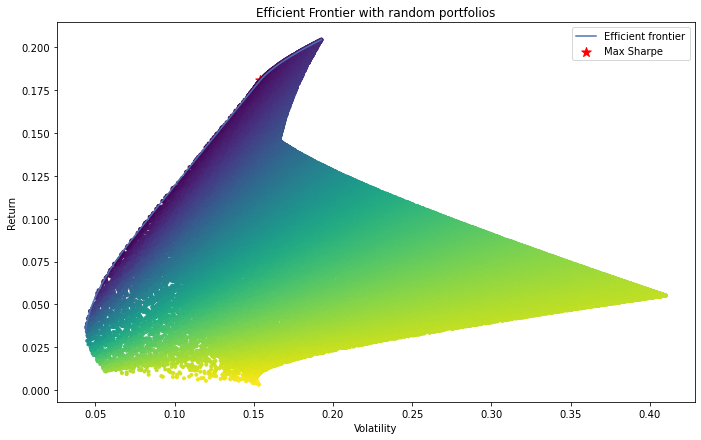

In [24]:
n_samples = 200000
w = np.random.dirichlet(test,n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize=(10,6))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.show()

In [25]:
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))

In [26]:
raw_weights_shortable = ef.max_sharpe()

In [27]:
raw_weights_shortable

OrderedDict([('GLD', -0.2033921382410824),
             ('IEF', 0.1621407293150865),
             ('QQQ', 1.0),
             ('SPY', -0.1290696536878625),
             ('TMF', 0.1703210626138584)])

In [28]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.05, 0.3))
raw_weights_cap30 = ef.max_sharpe()

In [29]:
raw_weights_cap30

OrderedDict([('GLD', 0.05),
             ('IEF', 0.2596297854306986),
             ('QQQ', 0.3),
             ('SPY', 0.3),
             ('TMF', 0.0903702145693014)])

In [30]:
ef = EfficientFrontier(mu, S, weight_bounds=(0, 0.2))
raw_weights_cap20 = ef.max_sharpe()
raw_weights_cap20

OrderedDict([('GLD', 0.2),
             ('IEF', 0.2),
             ('QQQ', 0.2),
             ('SPY', 0.2),
             ('TMF', 0.2)])